# Neural Network with Keras

### import necessary libraries

In [4]:
import tensorflow as tf
import keras
print ('keras_version: ', keras.__version__)
print ('tensorflow_version: ', tf.__version__)

keras_version:  2.2.4
tensorflow_version:  1.11.0


In [5]:
import os

import numpy as np

import cv2

import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

#from sklearn.utils import shuffle


### Load the dataset

In [6]:
PATH = os.getcwd()
# Define data path
data_path = os.path.join(PATH ,'data')
# Read out the folders or data classes
data_dir_list = os.listdir(data_path)
print ('data_list: ', data_dir_list)
num_classes=4
# Assign Labels to the datset
labels={'cats':0,'dogs':1,'horses':2,'Humans':3}
num_rows=64
num_cols=64

data_list:  ['cats', 'dogs', 'horses', 'Humans']


In [7]:
# the list to store the name and label of files
data_files = []
data_labels = []

# Loop over each class and read the train and test file and store it in list declared above
for data_dir in data_dir_list:
    label=labels[data_dir]
    print ('Loading the files of dataset-'+'{}\n'.format(data_dir))
    files=os.listdir(os.path.join(data_path,data_dir))
    for file in files:
        f_name = os.path.join(data_dir,file)
        data_files.append(f_name)
        data_labels.append(label)

num_train_samples = len(data_files)

data_labels = np_utils.to_categorical(data_labels,num_classes)# one hot encoding

#Shuffle the dataset
#data_files,data_labels = shuffle(data_files,data_labels, random_state=2)

Loading the files of dataset-cats

Loading the files of dataset-dogs

Loading the files of dataset-horses

Loading the files of dataset-Humans



In [8]:
data_files[200]

'horses\\horse-1.jpg'

In [9]:
# define the function to read the test data
def read_data():
    x=[]
    y=[]
    for fil,lab in zip(data_files,data_labels):
        #print ('file_read: ', data_path+'\\'+fil)
        img = cv2.imread(data_path+'\\'+fil)
        img=cv2.resize(img,(num_rows,num_cols))
        #cv2.imshow('img',img)
        #cv2.waitKey(1)
        x.append(img)
        y.append(lab)
    return x,y

In [10]:
#read the train and test data
data_x,data_y = read_data()
data_x,data_y=np.array(data_x),np.array(data_y)
m_train = data_x.shape[0]
#m_test = test_set_x_orig.shape[0]
img_size = data_x[0].shape
print ("Number of training examples: m_train = " + str(m_train))
#print ("Number of testing examples: m_test = " + str(m_test))
#print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size:", img_size)
print ("train_set_x shape: " + str(data_x.shape))
#print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(data_y.shape))
#print ("test_set_y shape: " + str(test_set_y.shape))


Number of training examples: m_train = 400
Each image is of size: (64, 64, 3)
train_set_x shape: (400, 64, 64, 3)
test_set_x shape: (400, 4)


In [11]:
# Reshape the training and test examples
data_x_flatten = data_x.reshape(data_x.shape[0], -1)

print ("data_x_flatten shape: " + str(data_x_flatten.shape))
print ("data_y shape: " + str(data_y.shape))

#print ("sanity check after reshaping: " + str(data_x_flatten[0:5,0]))
#data_x_flatten = data_x_flatten/255.
len(data_x_flatten)
print (data_x_flatten[1])

data_x_flatten shape: (400, 12288)
data_y shape: (400, 4)
[ 54  45  40 ...   9 175 180]


### without the normalization

In [12]:
num_epoch=300
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=data_x_flatten.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
#model.add(Activation('softmax'))
model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(data_x_flatten, data_y, epochs=num_epoch)

Epoch 1/300
400/400 [==============================] - 1s 3ms/step - loss: 11.9134 - acc: 0.2525
Epoch 2/300
400/400 [==============================] - 0s 916us/step - loss: 12.0886 - acc: 0.2500
Epoch 3/300
400/400 [==============================] - 0s 784us/step - loss: 12.0886 - acc: 0.2500
Epoch 4/300
400/400 [==============================] - 0s 803us/step - loss: 12.0886 - acc: 0.2500
Epoch 5/300
400/400 [==============================] - 0s 820us/step - loss: 12.0886 - acc: 0.2500
Epoch 6/300
400/400 [==============================] - 0s 669us/step - loss: 12.0886 - acc: 0.2500
Epoch 7/300
400/400 [==============================] - 0s 645us/step - loss: 12.0886 - acc: 0.2500
Epoch 8/300
400/400 [==============================] - 0s 498us/step - loss: 12.0886 - acc: 0.2500
Epoch 9/300
400/400 [==============================] - 0s 614us/step - loss: 12.0886 - acc: 0.2500
Epoch 10/300
400/400 [==============================] - 0s 550us/step - loss: 12.0886 - acc: 0.2500
Epoch 11/30

400/400 [==============================] - 0s 406us/step - loss: 12.0886 - acc: 0.2500
Epoch 84/300
400/400 [==============================] - 0s 362us/step - loss: 12.0886 - acc: 0.2500
Epoch 85/300
400/400 [==============================] - 0s 331us/step - loss: 12.0886 - acc: 0.2500
Epoch 86/300
400/400 [==============================] - 0s 381us/step - loss: 12.0886 - acc: 0.2500
Epoch 87/300
400/400 [==============================] - 0s 344us/step - loss: 12.0886 - acc: 0.2500
Epoch 88/300
400/400 [==============================] - 0s 356us/step - loss: 12.0886 - acc: 0.2500
Epoch 89/300
400/400 [==============================] - 0s 366us/step - loss: 12.0886 - acc: 0.2500
Epoch 90/300
400/400 [==============================] - 0s 322us/step - loss: 12.0886 - acc: 0.2500
Epoch 91/300
400/400 [==============================] - 0s 428us/step - loss: 12.0886 - acc: 0.2500
Epoch 92/300
400/400 [==============================] - 0s 378us/step - loss: 12.0886 - acc: 0.2500
Epoch 93/300


400/400 [==============================] - 0s 356us/step - loss: 12.0886 - acc: 0.2500
Epoch 165/300
400/400 [==============================] - 0s 369us/step - loss: 12.0886 - acc: 0.2500
Epoch 166/300
400/400 [==============================] - 0s 331us/step - loss: 12.0886 - acc: 0.2500
Epoch 167/300
400/400 [==============================] - 0s 334us/step - loss: 12.0886 - acc: 0.2500
Epoch 168/300
400/400 [==============================] - 0s 366us/step - loss: 12.0886 - acc: 0.2500
Epoch 169/300
400/400 [==============================] - 0s 337us/step - loss: 12.0886 - acc: 0.2500
Epoch 170/300
400/400 [==============================] - 0s 369us/step - loss: 12.0886 - acc: 0.2500
Epoch 171/300
400/400 [==============================] - 0s 334us/step - loss: 12.0886 - acc: 0.2500
Epoch 172/300
400/400 [==============================] - 0s 325us/step - loss: 12.0886 - acc: 0.2500
Epoch 173/300
400/400 [==============================] - 0s 331us/step - loss: 12.0886 - acc: 0.2500
Epoc

400/400 [==============================] - 0s 369us/step - loss: 12.0886 - acc: 0.2500
Epoch 245/300
400/400 [==============================] - 0s 362us/step - loss: 12.0886 - acc: 0.2500
Epoch 246/300
400/400 [==============================] - 0s 339us/step - loss: 12.0886 - acc: 0.2500
Epoch 247/300
400/400 [==============================] - 0s 334us/step - loss: 12.0886 - acc: 0.2500
Epoch 248/300
400/400 [==============================] - 0s 363us/step - loss: 12.0886 - acc: 0.2500
Epoch 249/300
400/400 [==============================] - 0s 344us/step - loss: 12.0886 - acc: 0.2500
Epoch 250/300
400/400 [==============================] - 0s 366us/step - loss: 12.0886 - acc: 0.2500
Epoch 251/300
400/400 [==============================] - 0s 364us/step - loss: 12.0886 - acc: 0.2500
Epoch 252/300
400/400 [==============================] - 0s 291us/step - loss: 12.0886 - acc: 0.2500
Epoch 253/300
400/400 [==============================] - 0s 416us/step - loss: 12.0886 - acc: 0.2500
Epoc

### with normalization

In [13]:
mean = np.mean(data_x_flatten)
std = np.std(data_x_flatten)
data_x_flatten = data_x_flatten-mean
data_x_flatten = data_x_flatten/std

In [14]:
num_epoch= 60
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=data_x_flatten.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
#model.add(Activation('softmax'))
model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(data_x_flatten, data_y, epochs=num_epoch)

Epoch 1/60
400/400 [==============================] - 0s 1ms/step - loss: 1.4306 - acc: 0.3325
Epoch 2/60
400/400 [==============================] - 0s 455us/step - loss: 1.0004 - acc: 0.5650
Epoch 3/60
400/400 [==============================] - 0s 509us/step - loss: 0.7884 - acc: 0.7225
Epoch 4/60
400/400 [==============================] - 0s 494us/step - loss: 0.5805 - acc: 0.8225
Epoch 5/60
400/400 [==============================] - 0s 414us/step - loss: 0.4599 - acc: 0.8825
Epoch 6/60
400/400 [==============================] - 0s 423us/step - loss: 0.3660 - acc: 0.9250
Epoch 7/60
400/400 [==============================] - 0s 428us/step - loss: 0.3121 - acc: 0.9450
Epoch 8/60
400/400 [==============================] - 0s 492us/step - loss: 0.2331 - acc: 0.9725
Epoch 9/60
400/400 [==============================] - 0s 400us/step - loss: 0.2002 - acc: 0.9800
Epoch 10/60
400/400 [==============================] - 0s 484us/step - loss: 0.1613 - acc: 0.9850
Epoch 11/60
400/400 [==========

In [15]:
score = model.evaluate(test_set_x, test_set_y)
print (score)

NameError: name 'test_set_x' is not defined

In [ ]:
model.predict(test_set_x[0:20])

In [ ]:
test_set_y[0:20]

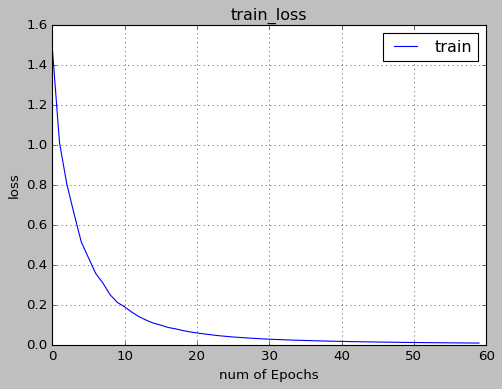

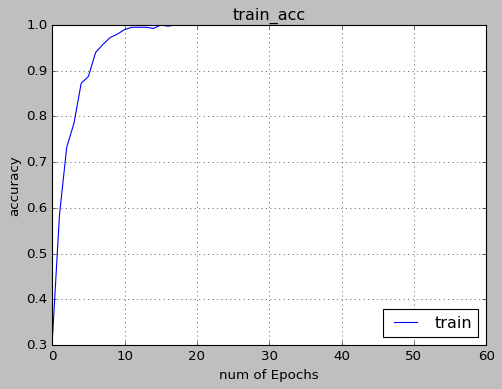

In [22]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
#val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
#val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
#plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss')
plt.grid(True)
plt.legend(['train'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
#plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc')
plt.grid(True)
plt.legend(['train'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])